<a href="https://colab.research.google.com/github/Lucassius/Python-Notebook-Projects/blob/main/Lista_3_Exercicio_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercício de CNN

Resolva o problema de detectar se uma pessoa está usando máscara ou não

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import load_img, img_to_array

from google.colab.patches import cv2_imshow

A base de dados mask.zip possui pastas com imagens de pessoas em 4 situações:
- Rosto totalmente coberto (tipo 0)
- Rosto descoberto (tipo 1)
- Imagem não é uma face (tipo 2)
- Rosto parcialmente coberto (tipo 3)

In [2]:
from IPython.display import clear_output

!curl -LO https://raw.githubusercontent.com/lucasvra/domotica_robotica/main/dados/mask.zip
!mkdir mask
!unzip -o mask.zip -d /content/mask

clear_output()

In [3]:
# Definir o caminho para a pasta das imagens
data_path = '/content/mask'

classes_dic = {
    'fully_covered':0,
    'not_covered':1,
    'not_face':2,
    'partially_covered':3
}

In [4]:
# Carregar as imagens e seus rótulos
images = []
labels = []
classes = list(filter(lambda f: not f.startswith('.'), os.listdir(data_path)))

for class_name in classes: #OBS: Tem formas melhores de fazer isso
    class_path = os.path.join(data_path, class_name)
    for img_name in os.listdir(class_path):
        if img_name.endswith(".jpg"):
          img_path = os.path.join(class_path, img_name)
          img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img, (64, 64))
          images.append(img)
          labels.append(classes_dic[class_name])

# Converter as listas em arrays numpy
images = np.array(images)
labels = np.array(labels)

In [5]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Redimensionar e normalizar as imagens de entrada
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1).astype('float32') / 255

In [20]:
# Criar o modelo da rede neural convolucional
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))
model.build()

# Utilizei duas camadas de convolução e duas camadas de max pooling para aumentar a precisão de identificação


# Compilar o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [25]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=12, batch_size=32, verbose=1)

Epoch 1/12
166/166 [==============================] - 34s 207ms/step - loss: 0.1782 - accuracy: 0.9415
Epoch 2/12
166/166 [==============================] - 35s 211ms/step - loss: 0.1325 - accuracy: 0.9564
Epoch 3/12
166/166 [==============================] - 34s 203ms/step - loss: 0.0803 - accuracy: 0.9756
Epoch 4/12
166/166 [==============================] - 34s 203ms/step - loss: 0.0696 - accuracy: 0.9768
Epoch 5/12
166/166 [==============================] - 34s 205ms/step - loss: 0.0406 - accuracy: 0.9873
Epoch 6/12
166/166 [==============================] - 33s 197ms/step - loss: 0.0446 - accuracy: 0.9843
Epoch 7/12
166/166 [==============================] - 34s 207ms/step - loss: 0.0426 - accuracy: 0.9860
Epoch 8/12
166/166 [==============================] - 34s 202ms/step - loss: 0.0285 - accuracy: 0.9906
Epoch 9/12
166/166 [==============================] - 33s 201ms/step - loss: 0.0221 - accuracy: 0.9930
Epoch 10/12
166/166 [==============================] - 38s 229ms/step - l

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print(f'Accuracy: {(accuracy*100):.2f}%')

42/42 [==============================] - 2s 47ms/step - loss: 0.1678 - accuracy: 0.9645
Loss: 0.16781558096408844
Accuracy: 96.45%


42/42 [==============================] - 3s 63ms/step
Predicao: not_covered | Real: not_covered


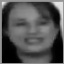

---
Predicao: not_covered | Real: not_covered


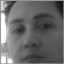

---
Predicao: not_covered | Real: not_covered


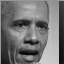

---
Predicao: not_covered | Real: not_covered


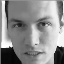

---
Predicao: fully_covered | Real: fully_covered


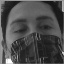

---
Predicao: fully_covered | Real: fully_covered


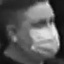

---
Predicao: not_covered | Real: not_covered


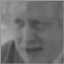

---
Predicao: not_face | Real: not_face


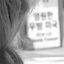

---
Predicao: not_covered | Real: not_covered


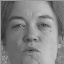

---
Predicao: not_covered | Real: not_covered


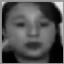

---


In [34]:
predictions = model.predict(X_test)
inv_dic = {v: k for k, v in classes_dic.items()}
# Exibir algumas previsões e os valores reais correspondentes
for i in range(10):
    print(f'Predicao: {inv_dic[predictions[i].argmax()]} | Real: {inv_dic[y_test[i]]}')
    cv2_imshow(X_test[i]*255)
    print('---')